In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Obtendo as tabelas de dados através do site:

details = pd.read_csv("http://email.gupy.com.br/c/eJwlT8tuhDAM_Bq4gRLnfeCwl_7GKjhOiQQEkWyr7dc3aSVLY3tGM3ZYYrSaw5gWYACMc"
                      "8etVEzOymGISsgA6FFJNUj2-breM-ZjXu9xa_o1eESjrBMagwAg0goQwgpWGjXuy1brVQbxGOCjVRGzP_xPPv136TZt1R1Vw"
                      "-vO4YU15bMNjbr8mai03morGtDh095nriVobhwToKETiigyyybjlJk4J5w8UZhISC24AgPaNVmg4mPKz0C1G81YvsZ7ibSni"
                      "1aqlXCju3245dqT-nVjXf4PeT__0n8BwhhboA")

priceav = pd.read_csv("http://email.gupy.com.br/c/eJwlT8tuxCAM_JrklgjzSjhw6KW_sQJjGqQ8UGC32n59oZUs2eOxZsbBxrhq4GOynHHOA"
                      "AysUjE5K4MhKiEDR4dKqkGyr2d-z3gds7_HzUoER4YL5At6HhEl885L0AGNAa3H3W615jKIj4F_tipidof7uU73XbpMW3VF1"
                      "Xq-r_DEmq6zgUZldyYqbV71Klqjw6W9Y9CSa1gME1yZTkAIQQGbFqOWCYBwWpmPkwmMsEWTUkA7C1RcTNcj3wnJvWYsr_G2k"
                      "faUyVOthBvd7cPtqt2ppxur_Q_yfvy5_wIT0lwb")

In [4]:
# Unindo as tabelas de acordo com o índice dos anúncios (listing_id)

df = pd.merge(details, priceav, how='inner', on='airbnb_listing_id')

# Query 1 - Ordene os bairros em ordem crescente de número de listings

In [5]:
# Nesse caso, deve ser usado o comando sort para ordenar do menor valor para o maior:

df.sort_values(by='airbnb_listing_id', inplace=True)

df

,Unnamed: 0_x,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Unnamed: 0.1,Unnamed: 0_y,booked_on,date,price_string,occupied
155275,2063,108658,Canasvieiras,Apartamento aconchegante de frente para o mar,2.0,2.0,NaN,False,0.0,24952,1346773,blank,2021-03-23,300.0,0
155205,2063,108658,Canasvieiras,Apartamento aconchegante de frente para o mar,2.0,2.0,NaN,False,0.0,24882,1346703,2021-01-15 00:00:00,2021-01-15,400.0,1
155204,2063,108658,Canasvieiras,Apartamento aconchegante de frente para o mar,2.0,2.0,NaN,False,0.0,24881,1346702,blank,2021-01-14,400.0,0
155203,2063,108658,Canasvieiras,Apartamento aconchegante de frente para o mar,2.0,2.0,NaN,False,0.0,24880,1346701,blank,2021-01-13,400.0,0
155202,2063,108658,Canasvieiras,Apartamento aconchegante de frente para o mar,2.0,2.0,NaN,False,0.0,24879,1346700,blank,2021-01-12,400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248127,3156,45575044,Lagoa da Conceição,Ilha do Sol Lagoa,2.0,2.0,5.0,True,14.0,64237,4267813,2020-10-21 00:00:00,2020-12-31,600.0,1
248126,3156,45575044,Lagoa da Conceição,Ilha do Sol Lagoa,2.0,2.0,5.0,True,14.0,64236,4267812,2020-10-21 00:00:00,2020-12-30,600.0,1
248125,3156,45575044,Lagoa da Conceição,Ilha do Sol Lagoa,2.0,2.0,5.0,True,14.0,64235,4267811,2020-10-21 00:00:00,2020-12-29,600.0,1
248132,3156,45575044,Lagoa da Conceição,Ilha do Sol Lagoa,2.0,2.0,5.0,True,14.0,64242,4267818,2020-12-12 00:00:00,2021-01-05,250.0,1


# Query 2 - Ordene os bairros em ordem crescente de faturamento médio dos listings

In [8]:
# Os valores dos imóveis estão no formato string e precisam ser alterados, então:

df['price_string'] = pd.to_numeric(df['price_string'])

In [9]:
# Deve-se então, calcular o faturamento médio para cada listing:

media = df.groupby(df['airbnb_listing_id'])
media = media['price_string'].mean()
media = media.sort_values()

In [10]:
# Agora é possível organizar os valores de acordo com a média de faturamento:

pd.DataFrame(media.sort_values())

,price_string
airbnb_listing_id,
42269547,54.000000
42298268,56.900000
42382598,59.835526
29681368,59.919355
28729150,60.000000
...,...
3993448,1500.000000
13397659,1650.000000
29680715,1960.000000


# Query 3 - Existem correlações entre as características de um anúncio e seu faturamento?

In [12]:
# Gráfico 1:

# Para obter alguns dados de comparação, separei 3 faixas de aluguel:

valor1 = media.loc[media < 200]
valor2 = media.loc[media == 600]
valor3 = media.loc[media > 1200]

In [13]:
# A partir da lista gerada pela média de lucro de cada listing, filtrei a tabela geral para obter os valores
# correspondentes pelo airbnb_listing_id

df1, df2, df3 = [], [], []

for i in range(len(valor1)):
    df1.append(df.loc[df['airbnb_listing_id'] == valor1.index[i]])
    df_valor1 = pd.concat(df1)

for i in range(len(valor2)):
    df2.append(df.loc[df['airbnb_listing_id'] == valor2.index[i]])
    df_valor2 = pd.concat(df2)

for i in range(len(valor3)):
    df3.append(df.loc[df['airbnb_listing_id'] == valor3.index[i]])
    df_valor3 = pd.concat(df3)

In [14]:
# Para fins de demonstração, fiz a média de quartos e banheiros por cada faixa de aluguel:

media_quartos = [df_valor1['number_of_bedrooms'].mean(), df_valor2['number_of_bedrooms'].mean(),
                 df_valor3['number_of_bedrooms'].mean()]

media_banheiros = [df_valor1['number_of_bathrooms'].mean(), df_valor2['number_of_bathrooms'].mean(),
                   df_valor3['number_of_bathrooms'].mean()]

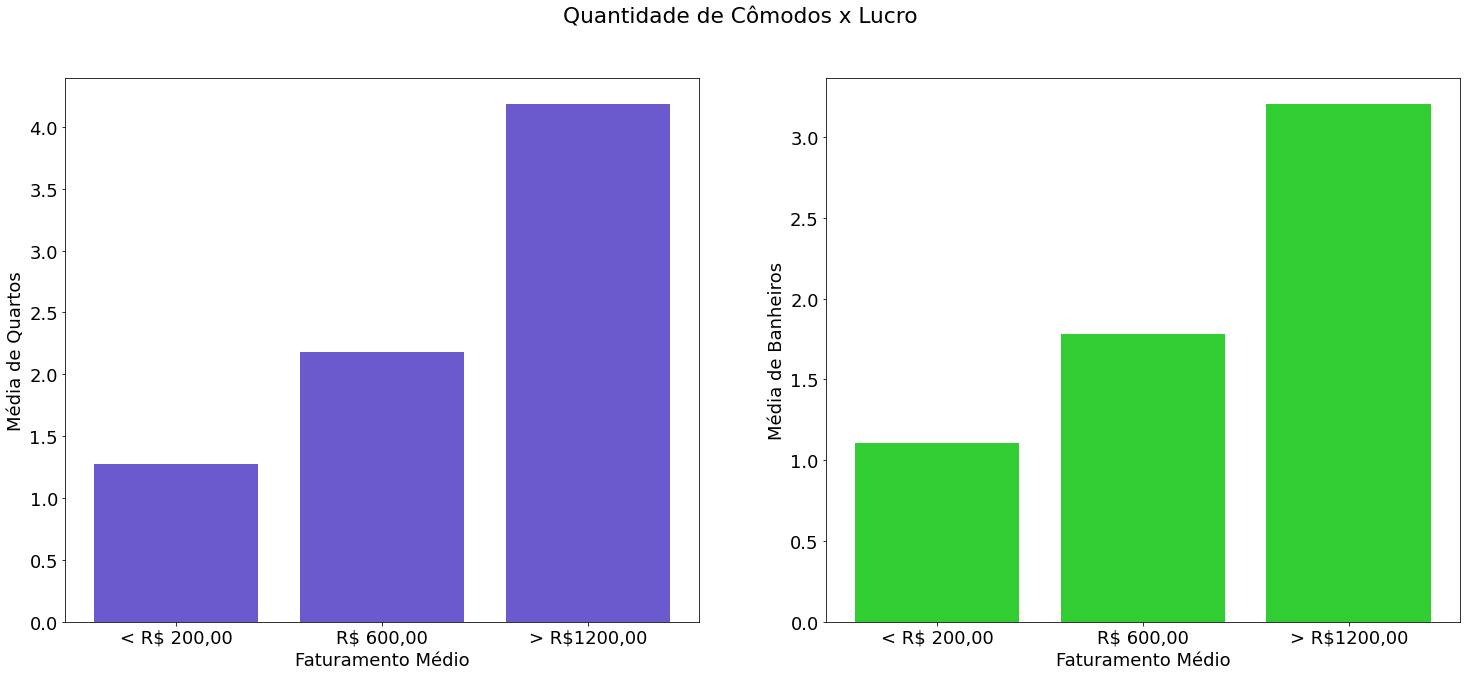

In [31]:
# Plotando o Gráfico 1:

x = ['< R$ 200,00', 'R$ 600,00', '> R$1200,00']


fig, axs = plt.subplots(1, 2, figsize=(25, 10))
plt.rcParams.update({'font.size': 18})
fig.suptitle('Quantidade de Cômodos x Lucro')
axs[0].set(xlabel='Faturamento Médio', ylabel='Média de Quartos')
axs[0].bar(x, media_quartos, color='slateblue')
axs[1].set(xlabel='Faturamento Médio', ylabel='Média de Banheiros')
axs[1].bar(x, media_banheiros, color='limegreen')
plt.show()

In [ ]:
"""
É possível observar maior faturamento de listing de acordo com o número de cômodos, ou seja, quanto maior o imóvel locado,
maior o faturamento.
"""

In [17]:
# Gráfico 2:

# Separei a tabela de acordo com cada valor de star_rating:

star_null = df.loc[df['star_rating'] == 0]
star_3 = df.loc[df['star_rating'] == 3]
star_35 = df.loc[df['star_rating'] == 3.5]
star_4 = df.loc[df['star_rating'] == 4]
star_45 = df.loc[df['star_rating'] == 4.5]
star_5 = df.loc[df['star_rating'] == 5]

In [18]:
# Foi feita, então, a média do valor de cada star_rating:

media = [star_null['price_string'].mean(), star_3['price_string'].mean(), star_35['price_string'].mean(),
         star_4['price_string'].mean(), star_45['price_string'].mean(), star_5['price_string'].mean()]

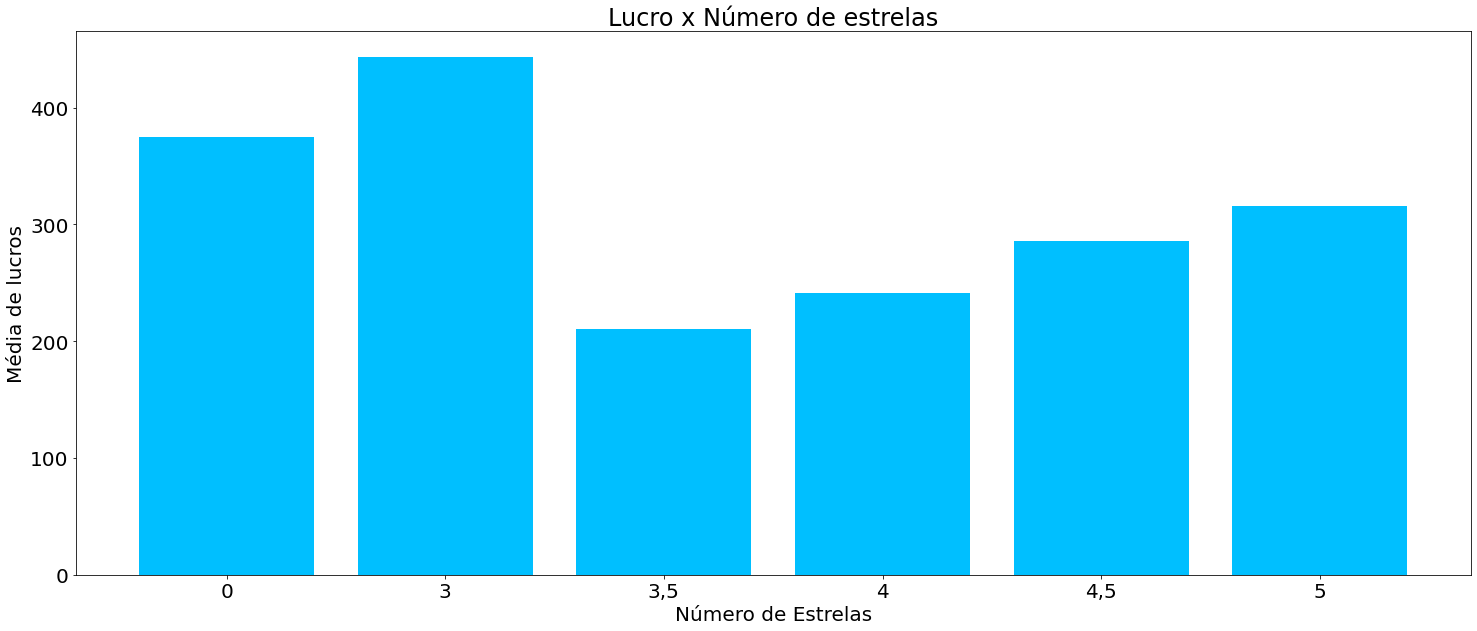

In [37]:
# Plotando o Gráfico 2:

x = ['0', '3', '3,5', '4', '4,5', '5']

plt.rcParams.update({'font.size': 20})
plt.title('Lucro x Número de estrelas')
plt.xlabel('Número de Estrelas')
plt.ylabel('Média de lucros')
plt.bar(x, media, color='deepskyblue')
plt.show()

In [ ]:
"""
Entretanto, pôde-se observar que não há boa correlação entre
classificação do imóvel e média do lucro obtido dos listings.
"""

# Query 4 - Qual a antecedência média das reservas?

In [6]:
# Para iniciar, foram filtradas as linhas que foram feitas reservas:

reservas = df.loc[df['booked_on'] != 'blank']

In [7]:
# Depois é necessário transformar as datas em um formato compreensível para a leitura:

booked = pd.to_datetime(reservas['booked_on'], format='%Y-%m-%d %H:%M:%S')
date = pd.to_datetime(reservas['date'], format='%Y-%m-%d')

In [8]:
# Calculando a diferença de dias:

delta = date - booked

# Sendo a antecedência média de dias:

print(f'Antecedência média: {delta.mean()}')

Antecedência média: 32 days 08:26:27.787888524


# a. Esse número é maior ou menor para finais de semana?

In [9]:
# Transformando as datas em dias de semana:

dias_semana = date.dt.weekday

In [10]:
# Para calcular a frequência de reservas para cada dia:

freq_semana = dias_semana.value_counts().rename_axis('Week_day')
freq_semana = pd.DataFrame(freq_semana).sort_values(by=['Week_day'])

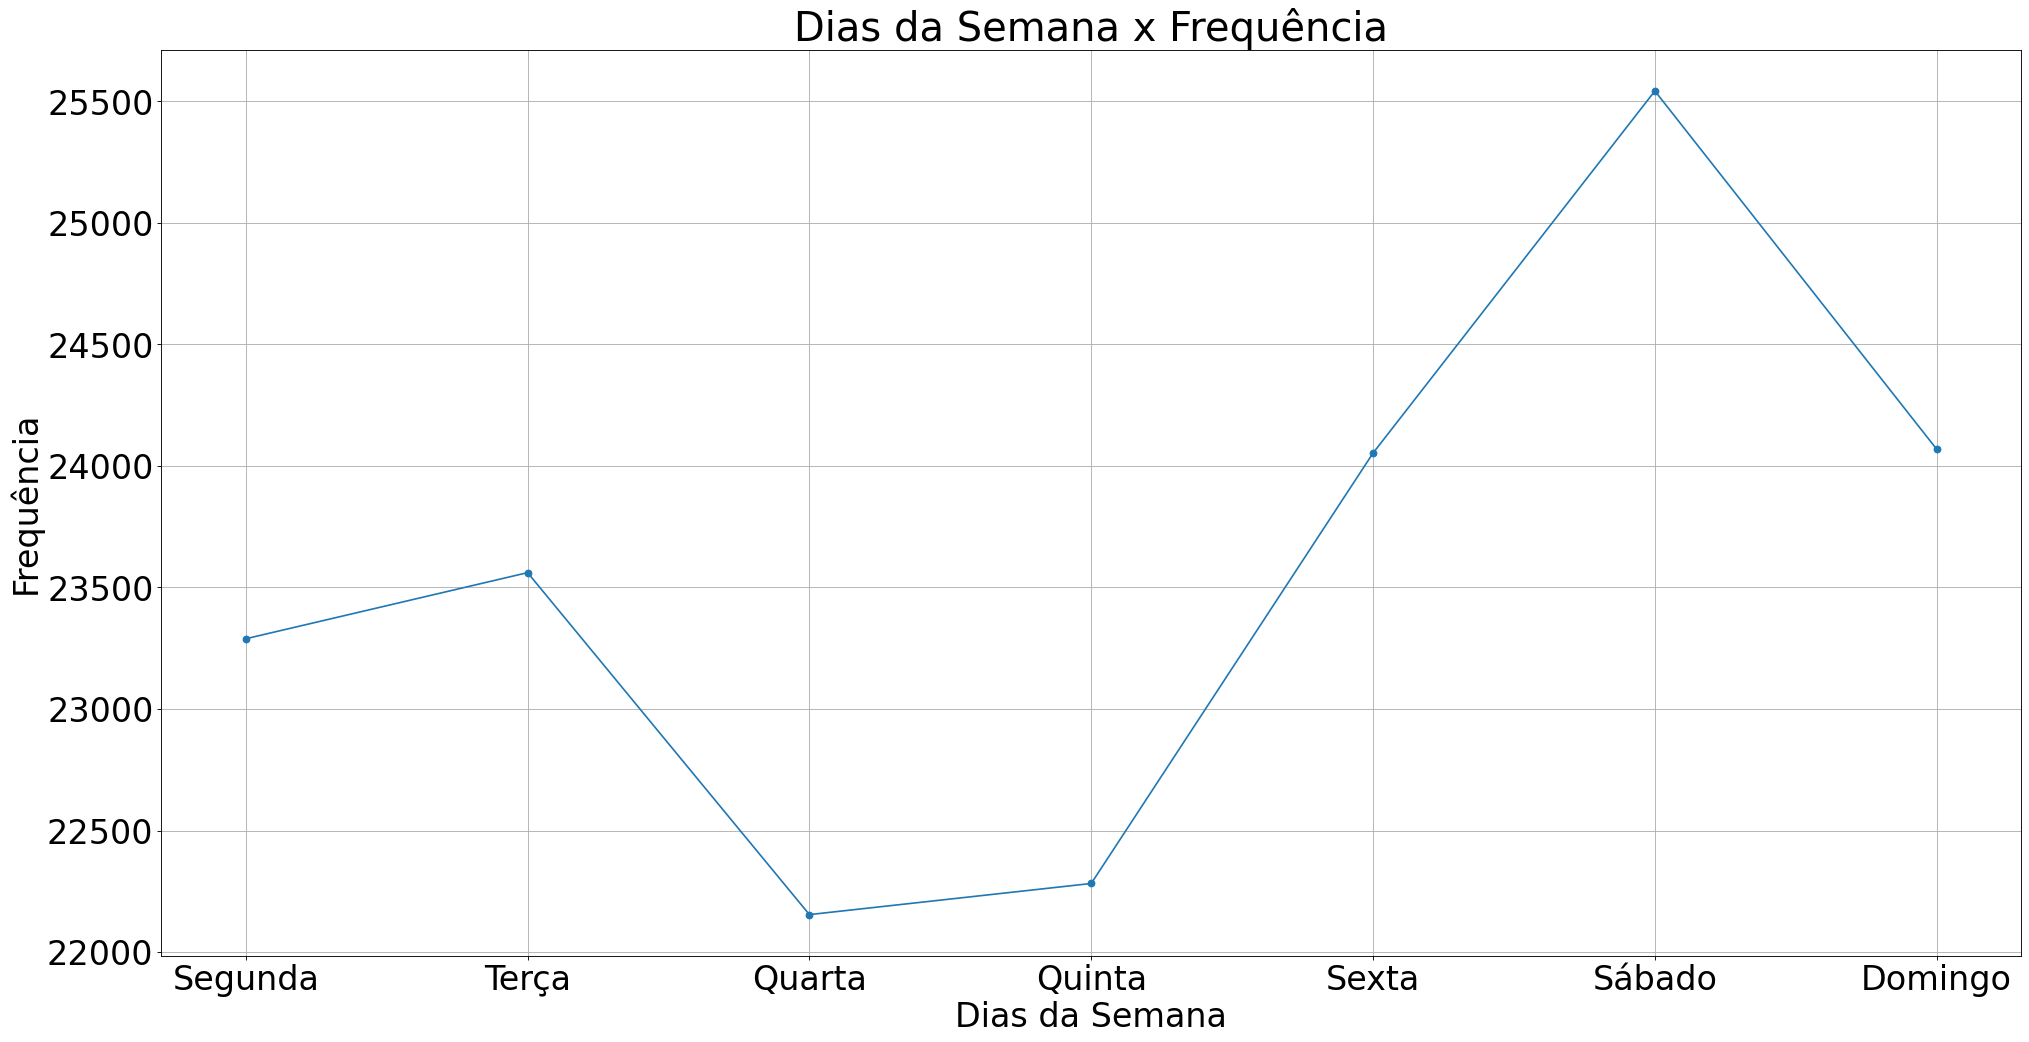

In [24]:
# Para poder obter uma melhor visualização das frequências de cada dia, gerei um gráfico de dias da semana X frequência:

dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

fig = plt.figure(figsize=(30, 15), dpi= 80)
plt.title('Dias da Semana x Frequência')
plt.xlabel('Dias da Semana')
plt.ylabel('Frequência')
plt.rcParams.update({'font.size': 20})
plt.plot(dias, freq_semana['date'], marker='o')
plt.grid()
plt.show()

In [1]:
"""
Através do Gráfico é possível dizer que as reservas são maiores para os sábados. As reservas no domingo se aproximam
das reservas na sexta-feira. Ao longo da semana os resultados são consideravelmente menores comparados ao fim de semana.
"""

'\nAtravés do Gráfico é possível dizer que as reservas são maiores para os sábados. As reservas no domingo se aproximam\ndas reservas na sexta-feira. Ao longo da semana os resultados são consideravelmente menores comparados ao fim de semana.\n'

In [13]:
# De forma mais intuitiva, o gráfico de pizza pode mostrar a diferença entre fim de semana e cada dia da semana.
# para isso, é preciso somar os valores de sábado e domingo e comparar com o resto da semana:

freq_dia, soma_fds = [], []


for i in range(len(freq_semana)):
    if i < 5:
        freq_dia.append(freq_semana['date'][i]/sum(freq_semana['date'])*100)
    elif i == 5:
        soma_fds = freq_semana['date'][i]
    else:
        freq_dia.append((freq_semana['date'][i] + soma_fds)/(sum(freq_semana['date']))*100)

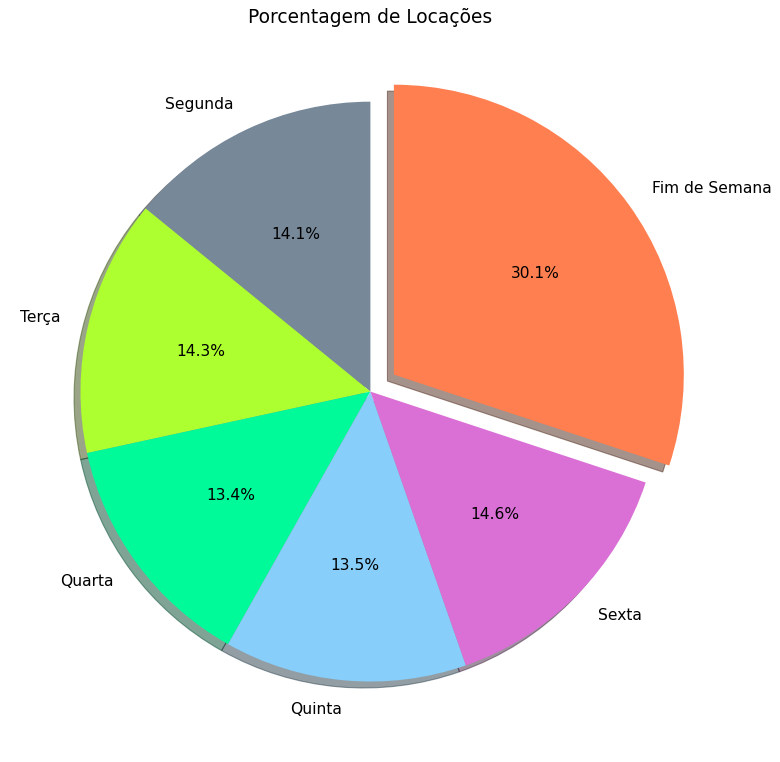

In [54]:
# Plotando o Gráfico:

dias_fds = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Fim de Semana']
colors = ['lightslategray','greenyellow','mediumspringgreen','lightskyblue', 'orchid', 'coral']

fig = plt.figure(figsize=(14, 12), dpi= 80)
plt.title('Porcentagem de Locações')
plt.rcParams.update({'font.size': 14})
plt.pie(freq_dia, labels=dias_fds, explode=(0, 0, 0, 0, 0, 0.1), shadow=True, startangle=90, autopct='%1.1f%%', colors=colors)
plt.show()